In [1]:
#import dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

#API keys:
api_alpha_vantage = "QDX8MNR1NV3HCLZK"

#Resources Used:
#https://www.alphavantage.co/documentation/
#https://medium.com/alpha-vantage/get-started-with-alpha-vantage-data-619a70c7f33a
#https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
#https://matplotlib.org/api/finance_api.html

In [2]:
#https://www.alphavantage.co/query?function=SECTOR&apikey=demo
alpha_base_url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY"
dji_query_url = alpha_base_url + "&symbol=" + "^W5000" + "&apikey=" + api_alpha_vantage
dji_response = requests.get(dji_query_url).json()
dji_response

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': '^W5000',
  '3. Last Refreshed': '2019-12-09',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2019-12-09': {'1. open': '32044.6602',
   '2. high': '32092.2109',
   '3. low': '10000.0000',
   '4. close': '31949.1973',
   '5. volume': '0'},
  '2019-11-29': {'1. open': '30945.6309',
   '2. high': '32171.5508',
   '3. low': '30945.6309',
   '4. close': '32025.8594',
   '5. volume': '0'},
  '2019-10-31': {'1. open': '30351.9199',
   '2. high': '31092.2793',
   '3. low': '29131.4805',
   '4. close': '30945.6309',
   '5. volume': '0'},
  '2019-09-30': {'1. open': '29841.3496',
   '2. high': '30921.2793',
   '3. low': '29574.2109',
   '4. close': '30351.9199',
   '5. volume': '0'},
  '2019-08-30': {'1. open': '30678.9004',
   '2. high': '31002.9199',
   '3. low': '28950.1602',
   '4. close': '29925.3496',
   '5. volume': '0'},
  '2019-07-31': {'1. open': '30410.3301',
   '2. high'

In [3]:
# Print the json (pretty printed)
print(json.dumps(dji_response, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Monthly Prices (open, high, low, close) and Volumes",
        "2. Symbol": "^W5000",
        "3. Last Refreshed": "2019-12-09",
        "4. Time Zone": "US/Eastern"
    },
    "Monthly Time Series": {
        "2000-02-29": {
            "1. open": "13392.7803",
            "2. high": "13813.6699",
            "3. low": "13124.3799",
            "4. close": "13511.0000",
            "5. volume": "0"
        },
        "2000-03-31": {
            "1. open": "13693.2998",
            "2. high": "14751.6396",
            "3. low": "13460.9902",
            "4. close": "14296.1797",
            "5. volume": "0"
        },
        "2000-04-28": {
            "1. open": "14121.6396",
            "2. high": "14341.1201",
            "3. low": "12474.6504",
            "4. close": "13541.7002",
            "5. volume": "0"
        },
        "2000-05-31": {
            "1. open": "13726.8203",
            "2. high": "13726.8203",
            "3. l

In [4]:
stock_pd = pd.DataFrame(dji_response["Monthly Time Series"])
stock_pd

,2019-12-09,2019-11-29,2019-10-31,2019-09-30,2019-08-30,2019-07-31,2019-06-28,2019-05-31,2019-04-30,2019-03-29,...,2000-11-30,2000-10-31,2000-09-29,2000-08-31,2000-07-31,2000-06-30,2000-05-31,2000-04-28,2000-03-31,2000-02-29
1. open,32044.6602,30945.6309,30351.9199,29841.3496,30678.9004,30410.3301,28369.3906,30463.7305,29266.9102,28974.5703,...,13252.5996,13522.2500,14329.9404,13363.0303,13750.2900,13368.1104,13726.8203,14121.6396,13693.2998,13392.7803
2. high,32092.2109,32171.5508,31092.2793,30921.2793,31002.9199,31168.5898,30464.9102,30490.0703,30483.1699,29579.6504,...,13404.6797,13522.2500,14329.9404,14280.0400,14236.6699,13862.2100,13726.8203,14341.1201,14751.6396,13813.6699
3. low,10000.0000,30945.6309,29131.4805,29574.2109,28950.1602,30365.1602,28107.0605,28338.2891,29266.9102,28194.8301,...,11976.2402,12354.8203,13465.2695,13363.0303,13196.5703,13368.1104,12610.6797,12474.6504,13460.9902,13124.3799
4. close,31949.1973,32025.8594,30945.6309,30351.9199,29925.3496,30684.8203,30268.0508,28369.3906,30410.0195,29266.9102,...,11976.2402,13314.6797,13613.3301,14280.0400,13330.3096,13618.5000,13052.9600,13541.7002,14296.1797,13511.0000
5. volume,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dji = stock_pd.transpose()
dji

,1. open,2. high,3. low,4. close,5. volume
2019-12-09,32044.6602,32092.2109,10000.0000,31949.1973,0
2019-11-29,30945.6309,32171.5508,30945.6309,32025.8594,0
2019-10-31,30351.9199,31092.2793,29131.4805,30945.6309,0
2019-09-30,29841.3496,30921.2793,29574.2109,30351.9199,0
2019-08-30,30678.9004,31002.9199,28950.1602,29925.3496,0
...,...,...,...,...,...
2000-06-30,13368.1104,13862.2100,13368.1104,13618.5000,0
2000-05-31,13726.8203,13726.8203,12610.6797,13052.9600,0
2000-04-28,14121.6396,14341.1201,12474.6504,13541.7002,0
2000-03-31,13693.2998,14751.6396,13460.9902,14296.1797,0


In [6]:
#rename column headers
dji = dji.rename_axis('index1').reset_index()

In [7]:
stocks = dji.rename(columns={"index1":"Month","1. open":"Open", "2. high":"Highest Price", "3. low": "Lowest Price",
                                     "4. close": "Close", "5. volume": "Volume"})
stocks

,Month,Open,Highest Price,Lowest Price,Close,Volume
0,2019-12-09,32044.6602,32092.2109,10000.0000,31949.1973,0
1,2019-11-29,30945.6309,32171.5508,30945.6309,32025.8594,0
2,2019-10-31,30351.9199,31092.2793,29131.4805,30945.6309,0
3,2019-09-30,29841.3496,30921.2793,29574.2109,30351.9199,0
4,2019-08-30,30678.9004,31002.9199,28950.1602,29925.3496,0
...,...,...,...,...,...,...
234,2000-06-30,13368.1104,13862.2100,13368.1104,13618.5000,0
235,2000-05-31,13726.8203,13726.8203,12610.6797,13052.9600,0
236,2000-04-28,14121.6396,14341.1201,12474.6504,13541.7002,0
237,2000-03-31,13693.2998,14751.6396,13460.9902,14296.1797,0


In [8]:
stocks["Month"] = pd.to_datetime(stocks["Month"])
stocks["Close"] = stocks.Close.astype(float)
stocks.dtypes

Month            datetime64[ns]
Open                     object
Highest Price            object
Lowest Price             object
Close                   float64
Volume                   object
dtype: object

In [9]:
dji_stock = stocks[["Month","Close"]]
dji_stock

,Month,Close
0,2019-12-09,31949.1973
1,2019-11-29,32025.8594
2,2019-10-31,30945.6309
3,2019-09-30,30351.9199
4,2019-08-30,29925.3496
...,...,...
234,2000-06-30,13618.5000
235,2000-05-31,13052.9600
236,2000-04-28,13541.7002
237,2000-03-31,14296.1797


<IPython.core.display.Javascript object>


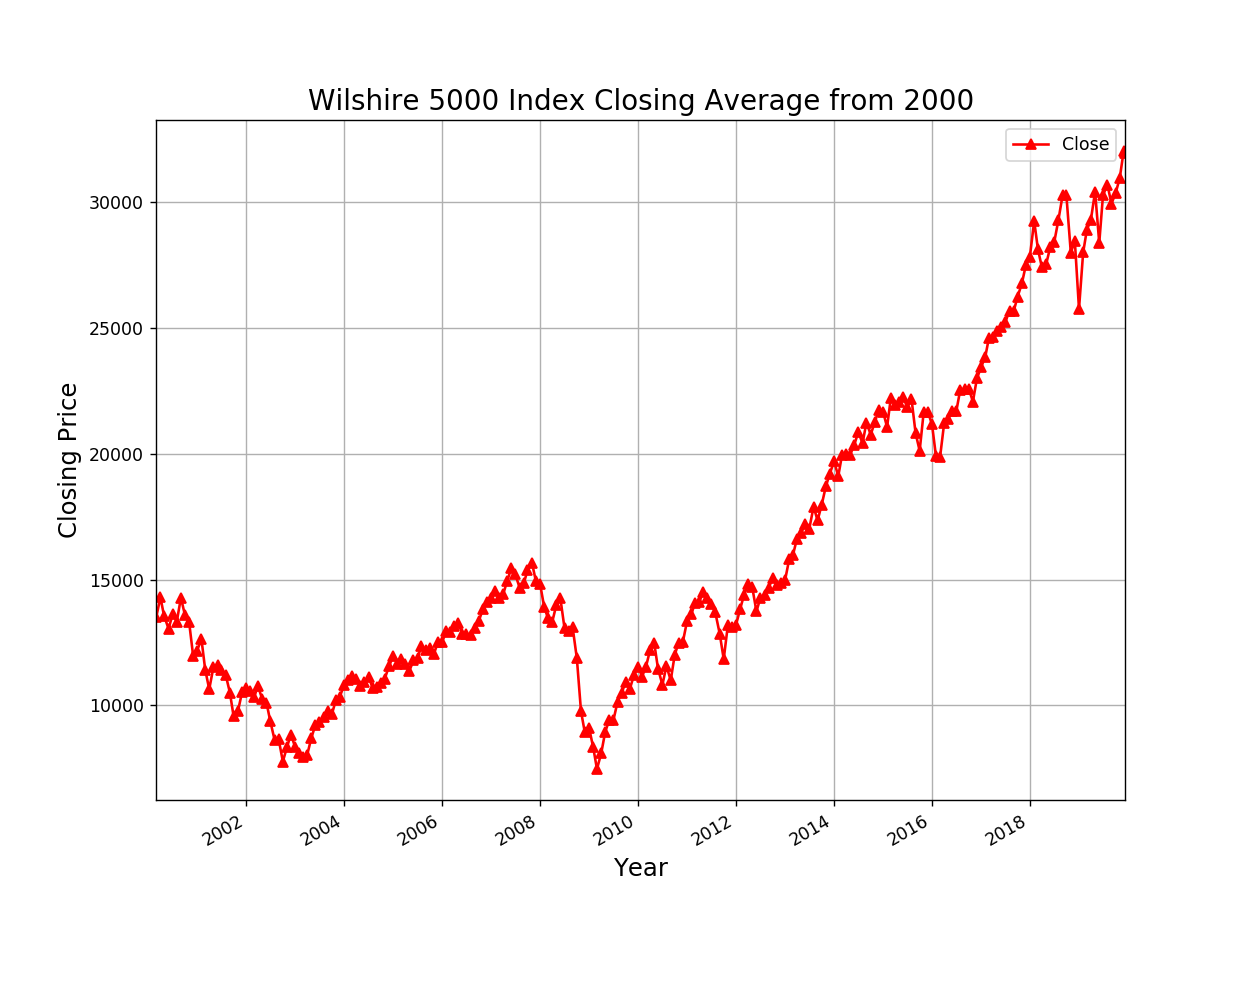

In [10]:
#plot the chart
dji_stock.plot(kind = "line", x = "Month", y = "Close", color = "red", figsize = (10,8), marker="^")
plt.show()
#Add labels to the x and y axes
plt.title("Wilshire 5000 Index Closing Average from 2000", size = 16)
plt.xlabel("Year", size = 14)
plt.ylabel("Closing Price", size = 14)
plt.grid()

In [22]:
plt.savefig("Wilshire.png")
plt.show()

In [12]:
#https://www.alphavantage.co/query?function=SECTOR&apikey=demo
alpha_base_url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY"
gspc_query_url = alpha_base_url + "&symbol=" + "^GSPC" + "&apikey=" + api_alpha_vantage
gspc_response = requests.get(gspc_query_url).json()
print(gspc_response)

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes', '2. Symbol': '^GSPC', '3. Last Refreshed': '2019-12-09', '4. Time Zone': 'US/Eastern'}, 'Monthly Time Series': {'2019-12-09': {'1. open': '3143.8501', '2. high': '3150.6001', '3. low': '3070.3301', '4. close': '3135.9600', '5. volume': '19048606273'}, '2019-11-29': {'1. open': '3050.7200', '2. high': '3154.2600', '3. low': '3050.7200', '4. close': '3140.9800', '5. volume': '72179920000'}, '2019-10-31': {'1. open': '2983.6899', '2. high': '3050.1001', '3. low': '2855.9399', '4. close': '3037.5601', '5. volume': '77564550000'}, '2019-09-30': {'1. open': '2909.0100', '2. high': '3021.9900', '3. low': '2891.8501', '4. close': '2976.7400', '5. volume': '73992330000'}, '2019-08-30': {'1. open': '2980.3201', '2. high': '3013.5901', '3. low': '2822.1201', '4. close': '2926.4600', '5. volume': '79599440000'}, '2019-07-31': {'1. open': '2971.4099', '2. high': '3027.9800', '3. low': '2952.2200', '4. close': '2

In [13]:
# Print the json (pretty printed)
print(json.dumps(gspc_response, indent=4, sort_keys=True))

{
    "Meta Data": {
        "1. Information": "Monthly Prices (open, high, low, close) and Volumes",
        "2. Symbol": "^GSPC",
        "3. Last Refreshed": "2019-12-09",
        "4. Time Zone": "US/Eastern"
    },
    "Monthly Time Series": {
        "2000-02-29": {
            "1. open": "1394.4600",
            "2. high": "1444.5500",
            "3. low": "1325.0699",
            "4. close": "1366.4200",
            "5. volume": "20912000000"
        },
        "2000-03-31": {
            "1. open": "1366.4200",
            "2. high": "1552.8700",
            "3. low": "1346.6200",
            "4. close": "1498.5800",
            "5. volume": "26156200000"
        },
        "2000-04-28": {
            "1. open": "1498.5800",
            "2. high": "1527.1899",
            "3. low": "1339.4000",
            "4. close": "1452.4301",
            "5. volume": "20106460000"
        },
        "2000-05-31": {
            "1. open": "1452.4301",
            "2. high": "1481.5100",
  

In [14]:
gspc_pd = pd.DataFrame(gspc_response["Monthly Time Series"])
gspc_pd

,2019-12-09,2019-11-29,2019-10-31,2019-09-30,2019-08-30,2019-07-31,2019-06-28,2019-05-31,2019-04-30,2019-03-29,...,2000-11-30,2000-10-31,2000-09-29,2000-08-31,2000-07-31,2000-06-30,2000-05-31,2000-04-28,2000-03-31,2000-02-29
1. open,3143.8501,3050.7200,2983.6899,2909.0100,2980.3201,2971.4099,2751.5300,2952.3301,2848.6299,2798.2200,...,1429.4000,1436.5200,1517.6801,1430.8300,1454.6000,1420.6000,1452.4301,1498.5800,1366.4200,1394.4600
2. high,3150.6001,3154.2600,3050.1001,3021.9900,3013.5901,3027.9800,2964.1499,2954.1299,2949.5200,2860.3101,...,1438.4600,1454.8199,1530.0900,1525.2100,1517.3199,1488.9301,1481.5100,1527.1899,1552.8700,1444.5500
3. low,3070.3301,3050.7200,2855.9399,2891.8501,2822.1201,2952.2200,2728.8101,2750.5200,2848.6299,2722.2700,...,1294.9000,1305.7900,1419.4399,1425.4301,1413.8900,1420.6000,1361.0900,1339.4000,1346.6200,1325.0699
4. close,3135.9600,3140.9800,3037.5601,2976.7400,2926.4600,2980.3799,2941.7600,2752.0601,2945.8301,2834.3999,...,1314.9500,1429.4000,1436.5100,1517.6801,1430.8300,1454.6000,1420.6000,1452.4301,1498.5800,1366.4200
5. volume,19048606273,72179920000,77564550000,73992330000,79599440000,70349470000,70881390000,76860120000,69604840000,78596280000,...,20532300000,25951400000,20838300000,20363700000,19089100000,21738300000,19898300000,20106460000,26156200000,20912000000


In [15]:
gspc = gspc_pd.transpose()
gspc

,1. open,2. high,3. low,4. close,5. volume
2019-12-09,3143.8501,3150.6001,3070.3301,3135.9600,19048606273
2019-11-29,3050.7200,3154.2600,3050.7200,3140.9800,72179920000
2019-10-31,2983.6899,3050.1001,2855.9399,3037.5601,77564550000
2019-09-30,2909.0100,3021.9900,2891.8501,2976.7400,73992330000
2019-08-30,2980.3201,3013.5901,2822.1201,2926.4600,79599440000
...,...,...,...,...,...
2000-06-30,1420.6000,1488.9301,1420.6000,1454.6000,21738300000
2000-05-31,1452.4301,1481.5100,1361.0900,1420.6000,19898300000
2000-04-28,1498.5800,1527.1899,1339.4000,1452.4301,20106460000
2000-03-31,1366.4200,1552.8700,1346.6200,1498.5800,26156200000


In [16]:
gspc = gspc.rename_axis('index1').reset_index()

In [17]:
stocks_gspc = gspc.rename(columns={"index1":"Month","1. open":"Open", "2. high":"Highest Price", "3. low": "Lowest Price",
                                     "4. close": "Close", "5. volume": "Volume"})
stocks_gspc

,Month,Open,Highest Price,Lowest Price,Close,Volume
0,2019-12-09,3143.8501,3150.6001,3070.3301,3135.9600,19048606273
1,2019-11-29,3050.7200,3154.2600,3050.7200,3140.9800,72179920000
2,2019-10-31,2983.6899,3050.1001,2855.9399,3037.5601,77564550000
3,2019-09-30,2909.0100,3021.9900,2891.8501,2976.7400,73992330000
4,2019-08-30,2980.3201,3013.5901,2822.1201,2926.4600,79599440000
...,...,...,...,...,...,...
234,2000-06-30,1420.6000,1488.9301,1420.6000,1454.6000,21738300000
235,2000-05-31,1452.4301,1481.5100,1361.0900,1420.6000,19898300000
236,2000-04-28,1498.5800,1527.1899,1339.4000,1452.4301,20106460000
237,2000-03-31,1366.4200,1552.8700,1346.6200,1498.5800,26156200000


In [18]:
stocks_gspc["Month"] = pd.to_datetime(stocks_gspc["Month"])
stocks_gspc["Close"] = stocks_gspc.Close.astype(float)
stocks_gspc.dtypes

Month            datetime64[ns]
Open                     object
Highest Price            object
Lowest Price             object
Close                   float64
Volume                   object
dtype: object

In [19]:
gspc_stock = stocks_gspc[["Month","Close"]]
gspc_stock

,Month,Close
0,2019-12-09,3135.9600
1,2019-11-29,3140.9800
2,2019-10-31,3037.5601
3,2019-09-30,2976.7400
4,2019-08-30,2926.4600
...,...,...
234,2000-06-30,1454.6000
235,2000-05-31,1420.6000
236,2000-04-28,1452.4301
237,2000-03-31,1498.5800


<IPython.core.display.Javascript object>


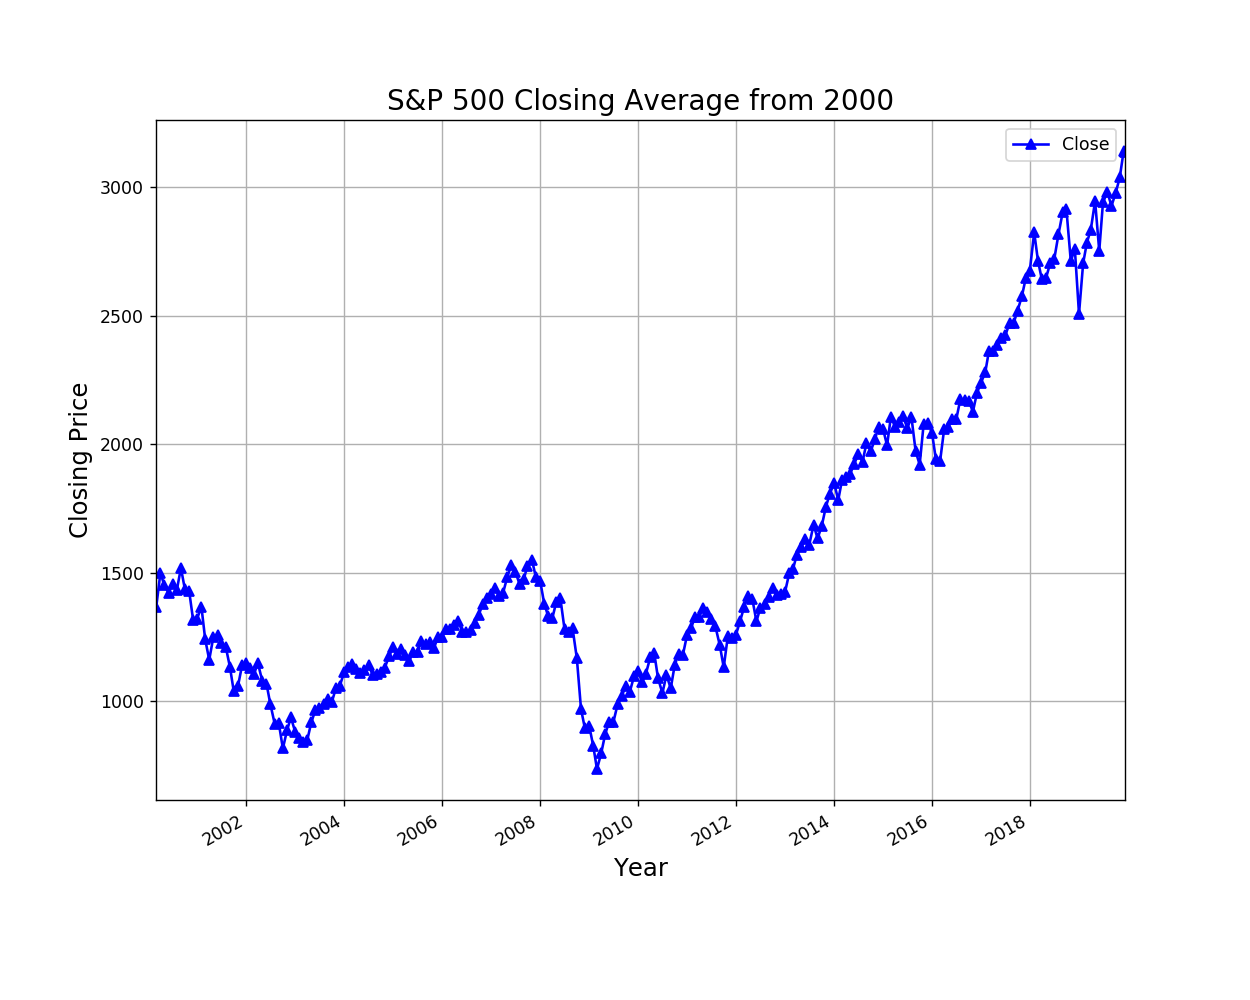

In [20]:
#plot the chart
gspc_stock.plot(kind = "line", x = "Month", y = "Close", color = "blue", figsize = (10,8), marker="^")
plt.show()
#Add labels to the x and y axes
plt.title("S&P 500 Closing Average from 2000", size = 16)
plt.xlabel("Year", size = 14)
plt.ylabel("Closing Price", size = 14)
plt.grid()

In [21]:
plt.savefig("GSPC.png")
plt.show()